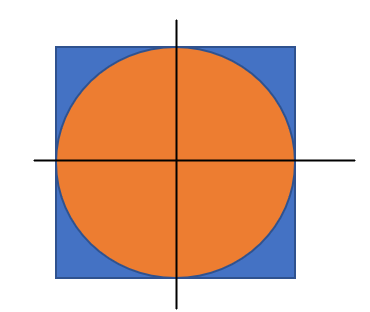

In [1]:
import random

In [70]:
x = random.uniform(0,1.000000001)
y = random.uniform(0,1.000000001)
print(x,y)

0.741731629184943 0.5275781005356479


In [75]:
def daireninIcindeMi(x,y):
    r2 = x**2 + y**2
    if r2 <= 1:
        return True
    else:
        return False

In [204]:
sum = 0
dene = 10000000
for i in range(dene):
    x = random.uniform(0,1.000000001)
    y = random.uniform(0,1.000000001)
    if (daireninIcindeMi(x,y)):
        sum += 1 # sum = sum +  1

pi = 4 * sum / dene
print(pi)

3.1418436


# Tamsayının ters çevrilmesi (Integer reverse)

In [218]:
# 92838747 => 74783829
# 492 => 294
def reverseInt(sayi):
    string = str(sayi)
    return string[::-1]

In [219]:
reverseInt(492)

'294'

In [205]:
4 % 3

1

In [206]:
import math

In [217]:
sayi = 498
print(sayi)
ters = 0
while sayi > 0:
    gecici = sayi % 10
    ters = (ters * 10) + gecici
    sayi = sayi // 10
print(ters)     

498
894


In [211]:
116 // 10

11

In [225]:
# Sınavda çıkabilecek tipte bir soru:
kelime = "Elmas madeni"
print(kelime[::-1]) # inedam samlE
print(kelime[:0:-1]) # inedam saml

inedam samlE
inedam saml


In [226]:
liste = 1,2,3,4

In [227]:
liste[2]

3

In [228]:
type(liste) # tuple  (sınavda benzer soru çıkabilir)

tuple

## Monotonic array
Sürekli artan veya azalan elemanları olan listeler (aynı da kalabilirler)
[1,4,6] => monotonic
[8,6,1] => monotonic
[2,6,3] => değil

In [230]:
all([1>0,3>2,1<3]) # true
# https://www.w3schools.com/python/ref_func_all.asp

True

In [231]:
all([1>0,3>2,1>3]) # false

False

In [232]:
liste = [2,5,7,9]

[i**2 for i in liste] # List comprehension

[4, 25, 49, 81]

In [233]:
[i**2==i*2 for i in liste] # List comprehension

[True, False, False, False]

In [234]:
[i for i in range(len(liste)-1)]

[0, 1, 2]

In [235]:
[liste[i] for i in range(len(liste)-1)]

[2, 5, 7]

In [236]:
[(liste[i],liste[i+1]) for i in range(len(liste)-1)]

[(2, 5), (5, 7), (7, 9)]

In [237]:
[liste[i+1]>=liste[i] for i in range(len(liste)-1)]

[True, True, True]

In [242]:
liste = [2,5,7,9,5]
[liste[i]<=liste[i+1] for i in range(len(liste)-1)]

[True, True, True, False]

In [243]:
[liste[i]>=liste[i+1] for i in range(len(liste)-1)]

[False, False, False, True]

In [244]:
all([liste[i]<=liste[i+1] for i in range(len(liste)-1)]) # sürekli artan

False

In [245]:
all([liste[i]>=liste[i+1] for i in range(len(liste)-1)]) # sürekli azalan

False

In [246]:
liste = [2,5,7,9,12]

any([all([liste[i]<=liste[i+1] for i in range(len(liste)-1)]),all([liste[i]>=liste[i+1] for i in range(len(liste)-1)])])

True

In [254]:
def artanCheck(liste):
    return all([liste[i]<=liste[i+1] for i in range(len(liste)-1)])

def azalanCheck(liste):
    return all([liste[i]>=liste[i+1] for i in range(len(liste)-1)])

def monotonicCheck(liste):
    return any([artanCheck(liste),azalanCheck(liste)])

In [255]:
monotonicCheck(liste = [2,5,7,9,12])

True

In [256]:
monotonicCheck(liste = [12,8,3,1])

True

In [257]:
monotonicCheck(liste = [12,8,3,1,4])

False

# Liste

In [259]:
class Kisi:
    def __init__(self,isim,id_no):
        self.isim = isim 
        self.id_no = id_no
        self.sonraki = None

In [321]:
class Liste(Kisi):
    def __init__(self):
        self.liste = []
    
    def len(self):
        return len(self.liste)
    
    def ekle(self,isim,id_no):
        # mevcut liste "sonraki" alanı None olan kişi => id_no olmalı
        yeni_isim = Kisi(isim,id_no)
        for mevcut in self.liste:
            if mevcut.sonraki is None:
                mevcut.sonraki = id_no
                break
        self.liste.append(yeni_isim)
        
    def tum_sonraki_ids(self):
        id_list = []
        for item in self.liste:
            id_list.append(item.sonraki)
        return id_list
    
    def get_kisi_by_sonraki(self,sonraki):
        for kisi in self.liste:
            if kisi.sonraki == sonraki:
                return kisi
        return None
        
    def ilk_eleman_olarak_ekle(self,isim,id_no):
        yeni_isim = Kisi(isim,id_no)
        #ilk eleman
        ilk_kisi_id = None
        tum_son_ids = self.tum_sonraki_ids()
        for mevcut in self.liste:
            if mevcut.id_no not in tum_son_ids:
                ilk_kisi_id = mevcut.id_no
                break
        if ilk_kisi_id is not None:
            yeni_isim.sonraki = ilk_kisi_id
            self.liste.append(yeni_isim)
    
    def setOncekiAsSon(self,sonraki_id):
        for kisi in self.liste:
            if kisi.sonraki == sonraki_id:
                kisi.sonraki = None
    
    
    def son_eleman_pop(self):
        if(len(self.liste)==0):
            return
        son_kisi = None
        for kisi in self.liste:
            if kisi.sonraki is None:
                son_kisi = kisi
                break
        if(len(self.liste)>1):
            self.setOncekiAsSon(son_kisi.id_no)
        self.liste.pop()
            
    
    def ilk_eleman_drop(self):
        pass
    
    def ortaya_ekle(self,isim,id_no,index):
        pass
    
    def ortadan_drop(self,index):
        pass
    
    def ordered_list(self):
        order_list = []
        if len(self.liste)==0:
            return None
        
        son_kisi = None
        for kisi in self.liste:
            if kisi.sonraki is None:
                son_kisi = kisi
                order_list.append(kisi)
                break
        #sondan bir önceki?
        while True:
            bir_onceki = self.get_kisi_by_sonraki(son_kisi.id_no)
            if bir_onceki is None:
                break
            order_list.append(bir_onceki)
            son_kisi = bir_onceki
        
        for isim in reversed(order_list):
            print(isim.isim,isim.id_no,isim.sonraki)
    
    def listele(self):
        for isim in self.liste:
            print(isim.isim,isim.id_no,isim.sonraki)

In [320]:
liste = Liste()
liste.ekle("Çelebi",1)
liste.ekle("Kaan",2)
liste.ekle("Nilda",3)
liste.ekle("Zeynep",4)
liste.ekle("Yağmur",5)
liste.ordered_list()
#
liste.son_eleman_pop()
print("----- Yeni Liste ----")
liste.ordered_list()
liste.son_eleman_pop()
print("----- Yeni Liste ----")
liste.ordered_list()
liste.son_eleman_pop()
print("----- Yeni Liste ----")
liste.ordered_list()
liste.son_eleman_pop()
print("----- Yeni Liste ----")
liste.ordered_list()
liste.son_eleman_pop()
print("----- Yeni Liste ----")
liste.ordered_list()
liste.son_eleman_pop()

Çelebi 1 2
Kaan 2 3
Nilda 3 4
Zeynep 4 5
Yağmur 5 None
----- Yeni Liste ----
Çelebi 1 2
Kaan 2 3
Nilda 3 4
Zeynep 4 None
----- Yeni Liste ----
Çelebi 1 2
Kaan 2 3
Nilda 3 None
----- Yeni Liste ----
Çelebi 1 2
Kaan 2 None
----- Yeni Liste ----
Çelebi 1 None
----- Yeni Liste ----


IndexError: pop from empty list